# **Lab 2.1 Image Enhancement with Math Operation**
This lab consists of two main subparts: Image Pixel Adjustment using Linear Equations and Gamma Equations.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

Read an image using OpenCV (Use your own image).

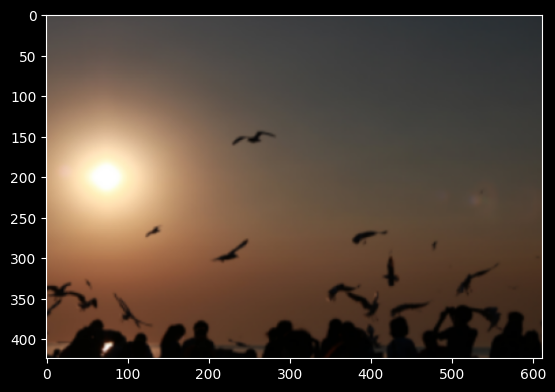

In [79]:
### START CODE HERE ###
img = cv2.imread('assets/sky.png')
img = cv2.cvtColor(cv2.imread('assets/sky.png'), cv2.COLOR_BGR2RGB)

plt.imshow(img)

### END CODE HERE ###

## **Image Pixel Adjustment**

### Using Linear Equation
$$I_{new} = I \cdot a + b$$

Please perform at ***least 20 iterations*** with varying values of $a$ and $b$.
Assign the result of each iteration to an array.<br/>

In [ ]:
### START CODE HERE ###
def quantize(img, bit_depth=8):
    min_val = img.min()
    max_val = img.max()
    quantized_image = (((img - min_val) / (max_val - min_val)) * (2 ** (bit_depth - 1))).astype(np.uint8)
    return quantized_image

def linear_operation(img, a=1, b=0):
      img = img.astype(np.float64) 
      adjusted_img = (((a * img) + b).clip(min=0, max=255)).astype(np.uint8)
      # adjusted_img = quantize(((a * img) + b)) -> no diference
      return adjusted_img 

def generate_brightness(num, step):
      half = num // 2
      return [x for x in range(-half * step + step//2, half * step + step//2, step)]

lin_result = []
brightness = generate_brightness(40, 10)
for b in brightness:
      lin_result.append(linear_operation(img=img, b=b))

### END CODE HERE ###

Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The reference output used 40 iterations.

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/1-1.png?raw=true)
</details>


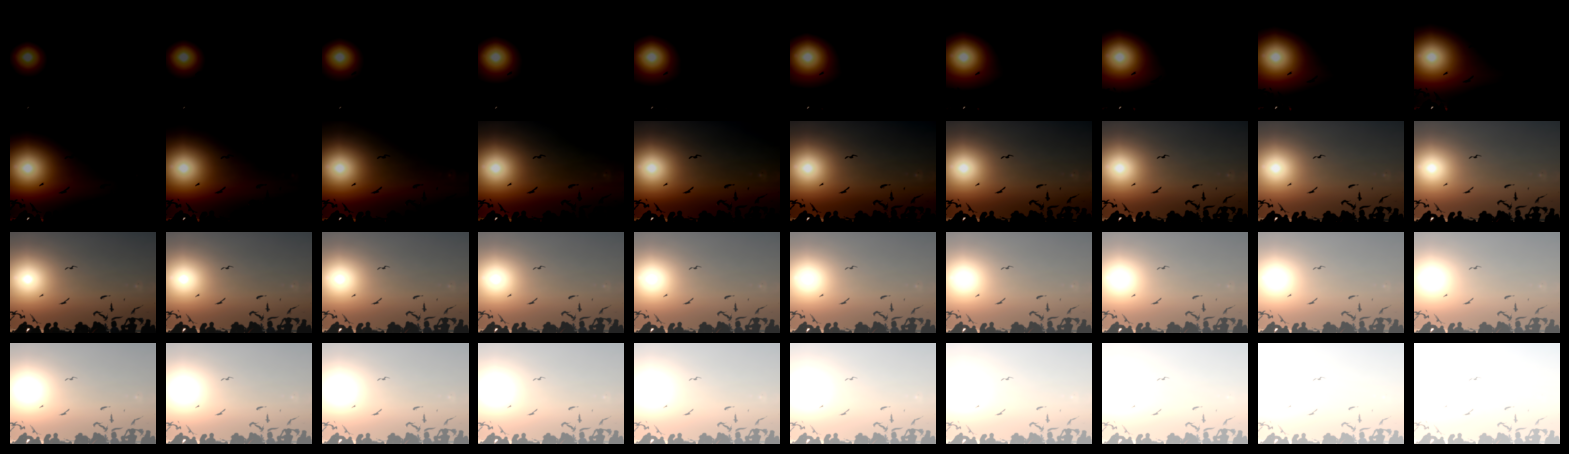

In [105]:
### START CODE HERE ###


fig = plt.figure(figsize=(20, 10))
plt.style.use('dark_background')

grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 10),  
                 axes_pad=0.1,  
                 )

for ax, im in zip(grid, lin_result):
    ax.axis('off')
    ax.imshow(im)

plt.show()
plt.show()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [97]:
assert len(lin_result) >= 20, f"Expected more than or equal 20 iterations but got {len(lin_result)}"
for idx, result in enumerate(lin_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Save the array of images to a video. Please complete the function below.

In [106]:
### START CODE HERE ###
def write_images_to_video(image_array, output_file, frame_rate=30):

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    height = image_array[0].shape[0]
    width = image_array[0].shape[1]
    out = cv2.VideoWriter(output_file, fourcc, frame_rate, (width, height))
    for frame in image_array:
        out.write(frame.astype(np.uint8))
    out.release()
### END CODE HERE ###

Use `write_images_to_video()` and save the result.

In [107]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_linear.mp4")
write_images_to_video(lin_result,output_file)

Now use `matplotlib.animation` to display the animation from the images array.

In [110]:
%%capture
### START CODE HERE ###
fig, ax = plt.subplots()
ax.axis('off')
ims = []
for frame in lin_result :
      im = ax.imshow(frame, animated=True)
      ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True)
plt.show()

### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![linear.gif](![<attachment:linear (2).gif>](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/linear.gif?raw=true))

</details>

In [111]:
display(HTML(ani.to_jshtml()))

### Gamma Equation
$$I_{new} = I^{\gamma} \cdot a + b$$

Where $a$ is 1 and $b$ is 0. 
Please perform ***at least 10 iterations*** for 0 < $\gamma$ < 1 and another ***at least 10 iterations*** for $\gamma$ > 1
Assign the result of each iteration to an array.<br/>


In [156]:
### START CODE HERE ###

def gamma_operation(img, gamma, a=1, b=0):
      img = img.astype(np.float64) 
      adjusted_img = ((((img**gamma)*a) + b).clip(min=0, max=255)).astype(np.uint8)
      # adjusted_img = quantize(((a * img) + b)) -> no diference
      return adjusted_img 

def generate_gamma(num, step):
      over_one = [round(1 + i * step, 5) for i in reversed(np.arange(1, num/2 + 1))]
      under_one = [round(1 - i * step, 5) for i in np.arange(1, num/2+ 1)]
      return over_one+under_one

gam_result = []

gamma_list = generate_gamma(20, 0.03)
for gamma in gamma_list:
      gam_result.append(gamma_operation(img=img, gamma=gamma))

### END CODE HERE ###

Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/1-2.png?raw=true)
</details>

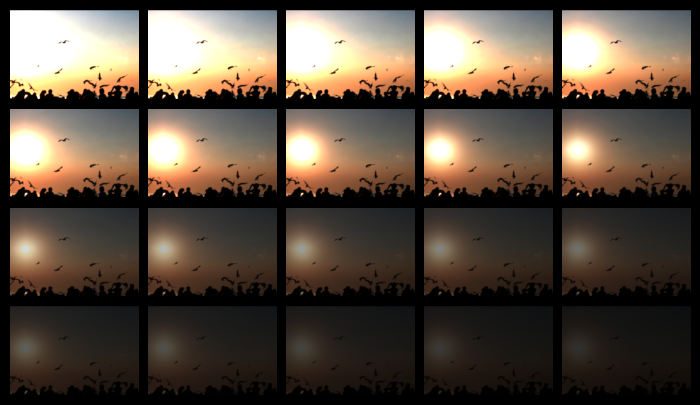

In [157]:
### START CODE HERE ###

fig = plt.figure(figsize=(10, 5))
plt.style.use('dark_background')

grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 5),  
                 axes_pad=0.1,  
                 )

for ax, im in zip(grid, gam_result):
    ax.axis('off')
    ax.imshow(im)

plt.show()
plt.show()
### END CODE HERE ###

In [158]:
assert len(gam_result) >= 20, f"more than or equal 20 iterations but got {len(gam_result)}"
for idx, result in enumerate(gam_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Use `write_images_to_video()` and save the result.

In [159]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_gamma.mp4")
write_images_to_video(gam_result,output_file)

Now use `matplotlib.animation` to display the animation from the images array.

In [164]:
%%capture
### START CODE HERE ###

fig, ax = plt.subplots()
ax.axis('off')
ims = []
for frame in gam_result :
      im = ax.imshow(frame, animated=True)
      ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)
plt.show()
### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![gamma2.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/gamma.gif?raw=true)

</details>

In [165]:
display(HTML(ani.to_jshtml()))

---

## **Questions**
1. If an image having over brightness or saturation, what would be possible solutions to enhance the image.
2. How can we make an image reverse intensity (black-to-white, white-to-black)? Explain the process